circles_data.xlsxという添付ファイルからデータを読み込み、クラ
スタ数を3に指定し、K-means法及びSpectral clustering法を用いて
クラスタリングを実行せよ。その後、各クラスタリング手法の
結果を視覚化せよ。

In [2]:
import pandas as pd

data_path = "data/circles_data.xlsx"

data = pd.read_excel(data_path)
data.head()

,feature1,feature2,label
0,1.097441,0.096112,0
1,1.259567,0.209110,0
2,1.096512,0.256846,0
3,1.239329,0.474147,0
4,1.184390,0.325017,0


## K-means

/Users/matsumoto-hirotomo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


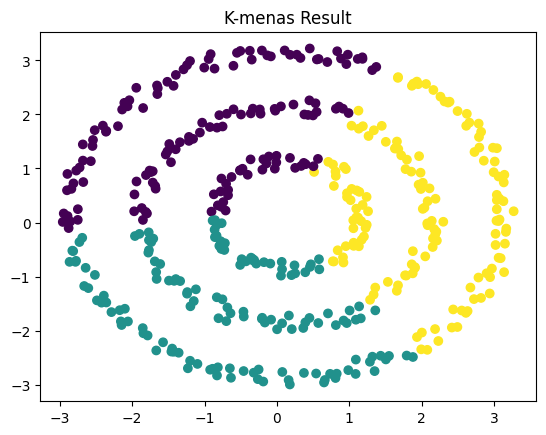

In [4]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
cluster_labels = kmeans.labels_

plt.scatter(data["feature1"],data["feature2"],c=cluster_labels)
plt.title("K-menas Result")
plt.show()

## Spectral clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as sd
from matplotlib.colors import ListedColormap
from sklearn import preprocessing as pp
from sklearn import cluster
from io import BytesIO

# データ生成
data = pd.read_excel(data_path)
colors = ["red", "blue", "green"]
cmap_rb = ListedColormap(colors)

# データスケーリング
data_scaled = pp.scale(data)

# スペクトラルクラスタリング
spkm = cluster.SpectralClustering(n_clusters=3, affinity="nearest_neighbors")
res_spkm = spkm.fit(data_scaled)

# プロットをバッファに保存する
plot_buffer = BytesIO()
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=res_spkm.labels_, cmap=cmap_rb)
plt.show()
plt.savefig(plot_buffer, format='png')
plt.close()  # プロットを閉じてメモリを節約

# バッファから画像データを取得
plot_buffer.seek(0)
image_data = plot_buffer.read()

# 結果を変数に格納
spectral_results = {
    "affinity_matrix": res_spkm.affinity_matrix_,
    "labels": res_spkm.labels_,
    "image_data": image_data,  # 画像データを変数に渡す
}

# 使用例：画像データをファイルに保存する場合
with open("spectral_clustering_plot.png", "wb") as f:
    f.write(spectral_results["image_data"])


/Users/matsumoto-hirotomo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as sd
from matplotlib.colors import ListedColormap
from sklearn import preprocessing as pp
from sklearn import cluster
from io import BytesIO

# データ生成
data = sd.make_moons(n_samples=300, noise=0.05, random_state=0)
colors = ["red", "blue"]
cmap_rb = ListedColormap(colors)

# データスケーリング
data_scaled = pp.scale(data[0])
print(data[0])

# スペクトラルクラスタリング
spkm = cluster.SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
res_spkm = spkm.fit(data_scaled)

# プロットをバッファに保存する
plot_buffer = BytesIO()
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=res_spkm.labels_, cmap=cmap_rb)
plt.savefig(plot_buffer, format='png')
plt.close()  # プロットを閉じてメモリを節約

# バッファから画像データを取得
plot_buffer.seek(0)
image_data = plot_buffer.read()

# 結果を変数に格納
spectral_results = {
    "affinity_matrix": res_spkm.affinity_matrix_,
    "labels": res_spkm.labels_,
    "image_data": image_data,  # 画像データを変数に渡す
}

# 使用例：画像データをファイルに保存する場合
with open("spectral_clustering_plot.png", "wb") as f:
    f.write(spectral_results["image_data"])


[[ 0.71541261 -0.49408918]
 [ 0.24678948 -0.24009066]
 [ 0.94326068  0.3467999 ]
 [ 0.9737422  -0.49290076]
 [ 1.2397133  -0.4114107 ]
 [-1.01268032  0.19344083]
 [ 1.17510658 -0.47743648]
 [ 0.66579578 -0.40894853]
 [ 0.49964772  0.85701497]
 [-0.70075928  0.79482792]
 [ 1.94187893  0.27689868]
 [ 0.92762623  0.31189552]
 [ 0.22843668 -0.22577849]
 [ 1.44327842 -0.49090786]
 [ 0.92559406  0.36730006]
 [-0.04467711  1.00255268]
 [ 1.78183782  0.00309463]
 [-0.38566633  0.96042378]
 [ 1.09277388 -0.55390691]
 [ 0.06941497  0.20050755]
 [ 0.37364784 -0.20572006]
 [-0.45723039  0.8916486 ]
 [-0.88272211  0.49107124]
 [-0.85741542  0.44206644]
 [ 0.9793197  -0.57945888]
 [-0.76876452  0.60408967]
 [ 0.41433502 -0.3051615 ]
 [ 2.0081785   0.24518153]
 [ 1.23828257 -0.50332731]
 [ 1.94922334  0.3952594 ]
 [-0.36151436  0.95165365]
 [ 0.29122597  0.98187047]
 [ 0.93801063  0.15057831]
 [-0.86546807  0.56310141]
 [ 0.80725506 -0.49012051]
 [ 0.00782533  0.51160905]
 [ 0.11666885 -0.03304569]
 

§ Iris データセットにおいて、階層クラスタリング手法と非階層クラスタリ
ング手法を用いてクラスタリングを実行せよ。得られたクラスタリング結
果を評価指標を使用して評価せよ。
• 階層クラスタリング手法と非階層クラスタリング手法について、それぞれ1つの
方法を自由に選択すること
• 少なくとも1種類の評価指標を用いてクラスタリング結果の良さを定量的に評価
すること
– 複数の評価指標を用いた場合はプラスに評価する
• クラスタリングの精度が高くなるような工夫を行った場合にはプラスに評価す
る

In [22]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
scaler = StandardScaler()
iris_norm = scaler.fit_transform(iris.data)
df = pd.DataFrame(iris_norm,columns=iris.feature_names)
df['target'] = iris.target
df.loc[df['target'] == 0, 'target'] = "setosa"
df.loc[df['target'] == 1, 'target'] = "versicolor"
df.loc[df['target'] == 2, 'target'] = "virginica"
df.head(5)

/var/folders/r2/q8_hcldj4f33gjgpcmt2s_yw0000gn/T/ipykernel_13897/1679166022.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'setosa' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['target'] == 0, 'target'] = "setosa"


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


/Users/matsumoto-hirotomo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/r2/q8_hcldj4f33gjgpcmt2s_yw0000gn/T/ipykernel_13897/2608250503.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


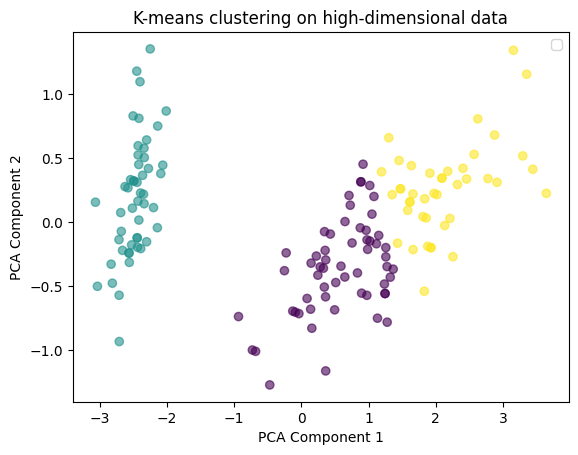

Adjusted Rand Index (ARI): 0.7021065635057377
Normalized Mutual Information (NMI): 0.7225098528948911


In [30]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score




# K-meansクラスタリング
n_clusters = 3  # クラスタの数
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(df.iloc[:,:3].values)

# クラスタリング結果の取得
centroids = kmeans.cluster_centers_  # セントロイド
inertia = kmeans.inertia_  # 各点とそのクラスタ中心の二乗和

#  次元削減と可視化
pca = PCA(n_components=2)  # 2次元に圧縮
data_2d = pca.fit_transform(df.iloc[:,:3].values)

plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)
#plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1],s=300, c='red', marker='X', label='Centroids')
plt.legend()
plt.title("K-means clustering on high-dimensional data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()



# クラスタリング結果のラベル（labels）と本来のターゲット（ground truth）
true_labels = df["target"].map({"setosa": 0, "versicolor": 1, "virginica": 2}).values  # ターゲットを数値にマッピング

# ランド指数と正規化相互情報量の計算
rand_index = adjusted_rand_score(true_labels, labels)
nmi = normalized_mutual_info_score(true_labels, labels)

# 結果の出力
print("Adjusted Rand Index (ARI):", rand_index)
print("Normalized Mutual Information (NMI):", nmi)


/Users/matsumoto-hirotomo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


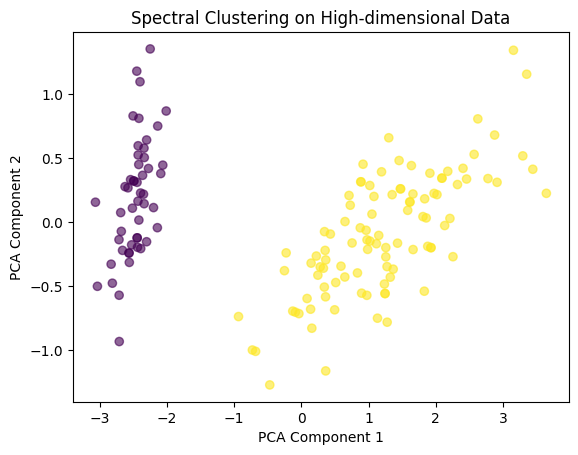

Adjusted Rand Index (ARI): 0.5681159420289855
Normalized Mutual Information (NMI): 0.7336804366512104


In [31]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Spectral Clusteringの適用
n_clusters = 2
sp_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=0)
labels = sp_clustering.fit_predict(df.iloc[:,:3].values)


# 高次元データの可視化 (必要に応じて)
pca = PCA(n_components=2)  # 2次元に次元削減
data_2d = pca.fit_transform(df.iloc[:,:3].values)

plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title("Spectral Clustering on High-dimensional Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

true_labels = df["target"].map({"setosa": 0, "versicolor": 1, "virginica": 2}).values  # ターゲットを数値にマッピング

# ランド指数と正規化相互情報量の計算
rand_index = adjusted_rand_score(true_labels, labels)
nmi = normalized_mutual_info_score(true_labels, labels)

# 結果の出力
print("Adjusted Rand Index (ARI):", rand_index)
print("Normalized Mutual Information (NMI):", nmi)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from sklearn.datasets import load_iris


                   

Adjusted Rand Index (ARI): 0.5583714437541352
Normalized Mutual Information (NMI): 0.720117603611598


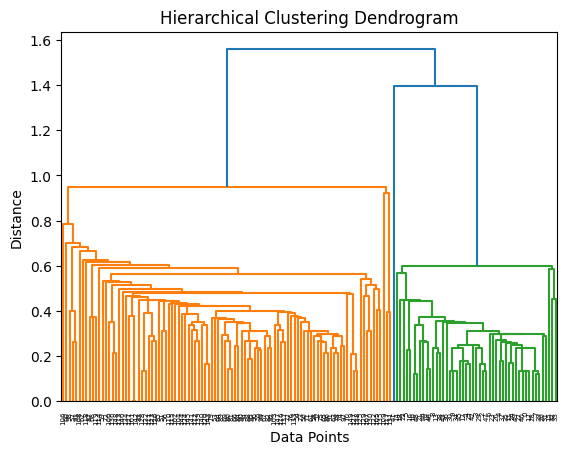

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler

# データ準備
data = iris.data
true_labels = iris.target  # ground truth ラベル

# 標準化（階層型クラスタリングではスケールの影響が大きいため）
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 類似度（ユークリッド距離）を計算
similarity = pdist(data_scaled, metric='euclidean')

# クラスタ間の類似度（距離）情報を計算
linkage_matrix = linkage(similarity, method='single')

# クラスタリング結果を取得
num_clusters = 3
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# 評価指標を計算
rand_index = adjusted_rand_score(true_labels, clusters)
nmi = normalized_mutual_info_score(true_labels, clusters)

# 結果を出力
print("Adjusted Rand Index (ARI):", rand_index)
print("Normalized Mutual Information (NMI):", nmi)
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()



In [40]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df.loc[df['target'] == 0, 'target'] = "setosa"
df.loc[df['target'] == 1, 'target'] = "versicolor"
df.loc[df['target'] == 2, 'target'] = "virginica"
df.head(5)

/var/folders/r2/q8_hcldj4f33gjgpcmt2s_yw0000gn/T/ipykernel_13897/2953919862.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'setosa' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['target'] == 0, 'target'] = "setosa"


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/Users/matsumoto-hirotomo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/r2/q8_hcldj4f33gjgpcmt2s_yw0000gn/T/ipykernel_13897/1976896640.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


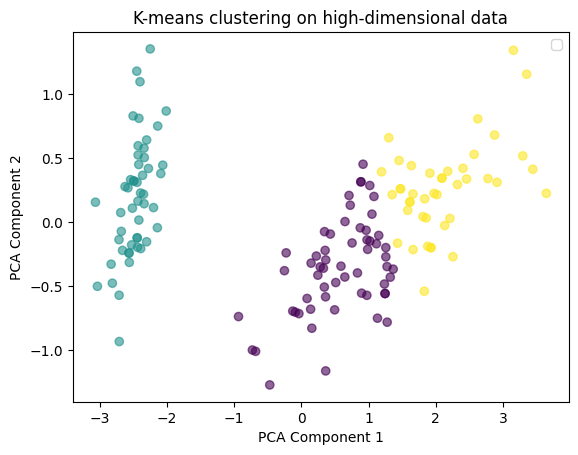

Adjusted Rand Index (ARI): 0.7021065635057377
Normalized Mutual Information (NMI): 0.7225098528948911


In [41]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score




# K-meansクラスタリング
n_clusters = 3  # クラスタの数
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(df.iloc[:,:3].values)

# クラスタリング結果の取得
centroids = kmeans.cluster_centers_  # セントロイド
inertia = kmeans.inertia_  # 各点とそのクラスタ中心の二乗和

#  次元削減と可視化
pca = PCA(n_components=2)  # 2次元に圧縮
data_2d = pca.fit_transform(df.iloc[:,:3].values)

plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)
#plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1],s=300, c='red', marker='X', label='Centroids')
plt.legend()
plt.title("K-means clustering on high-dimensional data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()



# クラスタリング結果のラベル（labels）と本来のターゲット（ground truth）
true_labels = df["target"].map({"setosa": 0, "versicolor": 1, "virginica": 2}).values  # ターゲットを数値にマッピング

# ランド指数と正規化相互情報量の計算
rand_index = adjusted_rand_score(true_labels, labels)
nmi = normalized_mutual_info_score(true_labels, labels)

# 結果の出力
print("Adjusted Rand Index (ARI):", rand_index)
print("Normalized Mutual Information (NMI):", nmi)

/Users/matsumoto-hirotomo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


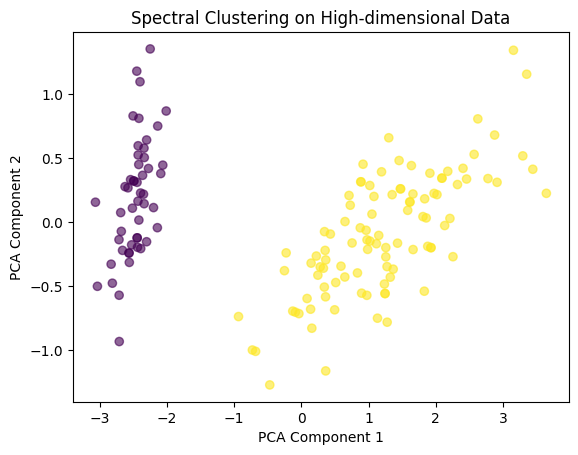

Adjusted Rand Index (ARI): 0.5681159420289855
Normalized Mutual Information (NMI): 0.7336804366512104


In [42]:



# Spectral Clusteringの適用
n_clusters = 2
sp_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=0)
labels = sp_clustering.fit_predict(df.iloc[:,:3].values)


# 高次元データの可視化 (必要に応じて)
pca = PCA(n_components=2)  # 2次元に次元削減
data_2d = pca.fit_transform(df.iloc[:,:3].values)

plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title("Spectral Clustering on High-dimensional Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

true_labels = df["target"].map({"setosa": 0, "versicolor": 1, "virginica": 2}).values  # ターゲットを数値にマッピング

# ランド指数と正規化相互情報量の計算
rand_index = adjusted_rand_score(true_labels, labels)
nmi = normalized_mutual_info_score(true_labels, labels)

# 結果の出力
print("Adjusted Rand Index (ARI):", rand_index)
print("Normalized Mutual Information (NMI):", nmi)

Adjusted Rand Index (ARI): 0.5637510205230709
Normalized Mutual Information (NMI): 0.7174643320814476


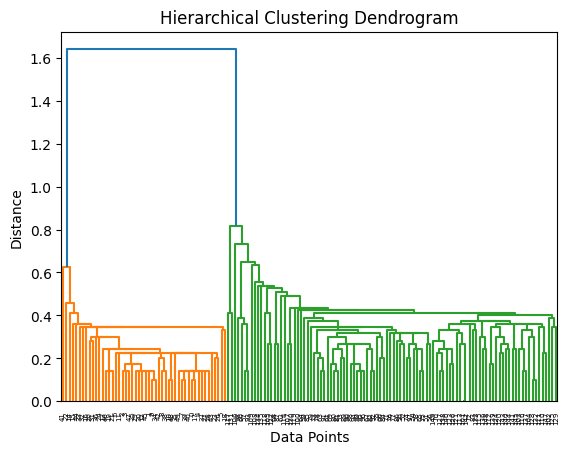

In [44]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler

# データ準備
data = iris.data
true_labels = iris.target  # ground truth ラベル

# 標準化（階層型クラスタリングではスケールの影響が大きいため）


# 類似度（ユークリッド距離）を計算
similarity = pdist(data, metric='euclidean')

# クラスタ間の類似度（距離）情報を計算
linkage_matrix = linkage(similarity, method='single')

# クラスタリング結果を取得
num_clusters = 3
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# 評価指標を計算
rand_index = adjusted_rand_score(true_labels, clusters)
nmi = normalized_mutual_info_score(true_labels, clusters)

# 結果を出力
print("Adjusted Rand Index (ARI):", rand_index)
print("Normalized Mutual Information (NMI):", nmi)
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()